<a href="https://colab.research.google.com/github/Apaulgithub/Cardiovascular_Risk_Prediction/blob/main/ML_Cardiovascular_Risk_Prediction_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member Name -** Arindam Paul

# **Project Summary -**

The goal of this project was to use machine learning techniques to predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provided information on over 4,000 patients and included 15 attributes, each representing a potential risk factor for CHD. These attributes included demographic, behavioral, and medical risk factors.

To prepare the data for analysis, extensive preprocessing was performed to clean and transform the data. This included handling missing values using median, mode, and KNN imputation techniques, as well as identifying and removing outliers using the Interquartile Range (IQR) method. Skewed continuous variables were also transformed using log and square root transformations to reduce skewness and improve model performance.

Feature selection was performed using variance inflation factor to remove multicollinearity and a new feature called pulse pressure was created to capture the relationship between systolic and diastolic blood pressure. Redundant columns were also removed to simplify the dataset. The most important features for predicting CHD risk were identified as ‘age’, ‘sex’, ‘education’, ‘cigs_per_day’, ‘bp_meds’, ‘prevalent_stroke’, ‘prevalent_hyp’, ‘diabetes’, ‘total_cholesterol’, ‘bmi’, ‘heart_rate’, ‘glucose’, and ‘pulse_pressure’.

To handle the imbalanced nature of the dataset, the SMOTE combined with Tomek links undersampling technique was used to balance the class distribution and improve model performance. The data was also scaled using standard scalar method to ensure that all features were on the same scale.

Several machine learning models were evaluated on their performance on the primary evaluation metric of recall. After careful analysis, the Neural Network (tuned) was chosen as the final prediction model because it had the highest recall score among the models evaluated. By selecting a model with a high recall score, the goal was to correctly identify as many patients with CHD risk as possible, even if it meant having some false positives.

Overall, this project demonstrated the potential of machine learning techniques to accurately predict CHD risk in patients using data from a cardiovascular study. By carefully preprocessing and transforming the data, selecting relevant features, and choosing an appropriate model based on its performance on a relevant evaluation metric, it was possible to achieve a positive business impact by accurately predicting CHD risk in patients.

# **GitHub Link -**

https://github.com/Apaulgithub/Cardiovascular_Risk_Prediction.git

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import Sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset from github repository
data = pd.read_csv('https://raw.githubusercontent.com/Apaulgithub/Cardiovascular_Risk_Prediction/main/data_cardiovascular_risk.csv')

### Dataset First View

In [3]:
# Dataset First Look
# View top 5 rows of the dataset
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
# View last 5 rows of the dataset
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [5]:
# Dropping the id column (not relevant)
data.drop(columns=['id'], inplace=True)

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  3390
Number of columns are:  16


### Dataset Information

In [7]:
# Dataset Info
# Checking information about the dataset using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


#### Duplicate Values

In [8]:
# Checking Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Checking missing values/null values count for each column
data.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

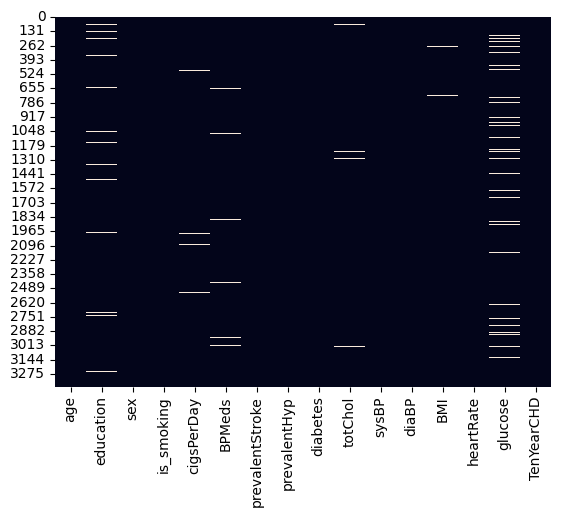

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

There are a total of 16 feature columns where 'TenYearCHD' is the dependent variable column.
The total number of observations(rows) are 3390.

There are no duplicate rows in the dataset.

Also there are missing values in the columns education, cigs per day, BP meds, totChol, BMI, heart rate and glucose.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe (all columns included)
data.describe(include= 'all').round(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.00,3303.00,3390,3390,3368.00,3346.00,3390.00,3390.00,3390.00,3352.00,3390.00,3390.00,3376.00,3389.00,3086.00,3390.00
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.54,1.97,NaN,NaN,9.07,0.03,0.01,0.32,0.03,237.07,132.60,82.88,25.79,75.98,82.09,0.15
std,8.59,1.02,NaN,NaN,11.88,0.17,0.08,0.46,0.16,45.25,22.29,12.02,4.12,11.97,24.24,0.36
min,32.00,1.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
25%,42.00,1.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,206.00,117.00,74.50,23.02,68.00,71.00,0.00
50%,49.00,2.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,234.00,128.50,82.00,25.38,75.00,78.00,0.00
75%,56.00,3.00,NaN,NaN,20.00,0.00,0.00,1.00,0.00,264.00,144.00,90.00,28.04,83.00,87.00,0.00


### Variables Description

**Demographic:**
* Sex: male or female ("M" or "F")
* Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current):**
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target):**
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable using a for loop
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Before doing any data wrangling lets create copy of the dataset
data_2 = data.copy()

In [15]:
# Renaming the columns
data_2.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [16]:
# Defining 3 lists containing the column names of
# This is defined based on the number of unique values for each attribute
dependent_var = ['ten_year_chd']

categorical_var = [i for i in data_2.columns if data_2[i].nunique()<=4]
continuous_var = [i for i in data_2.columns if i not in categorical_var]

In [17]:
categorical_var

['education',
 'sex',
 'is_smoking',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

In [18]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

### What all manipulations have you done and insights you found?

Changed the names of all the columns for ease of use.

We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Dependent variable Distribution

0    2879
1     511
Name: ten_year_chd, dtype: int64
 


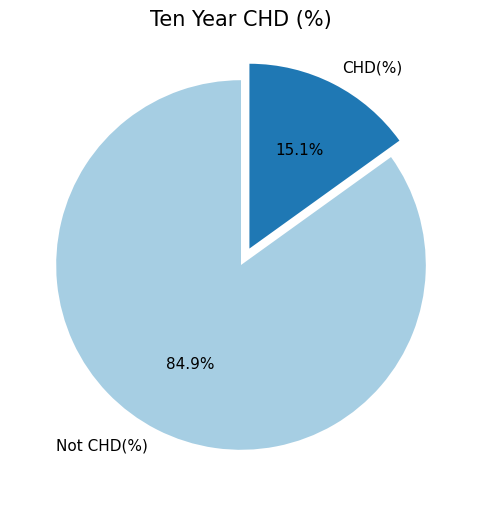

In [71]:
# Chart - 1 Visualization code for Distribution of dependent varaible - ten_year_chd

# Dependant Column Value Counts
print(data_2.ten_year_chd.value_counts())
print(" ")

#color palette selection
colors = sns.color_palette("Paired")

# plotting data on chart
plt.figure(figsize=(10,6))
explode = [0,0.1]
textprops = {'fontsize':11}
plt.pie(data_2['ten_year_chd'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Ten Year CHD (%)', fontsize=15)

# displaying chart
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that 15.1% that is 511 out of 3390 are classified as positive for 10 year CHD whereas the remaining 84.9% that is 2879 out of 3390 are classified as negative for 10 year CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart show that 15.1% of the population has a positive classification for 10-year CHD, while 84.9% have a negative classification. This information can help businesses in the healthcare industry develop targeted strategies. There are no specific insights in the chart that indicate negative growth, but failure to address high CHD prevalence could have negative implications for public health and healthcare businesses.

#### Chart - 2 : Distribution/ Box plot

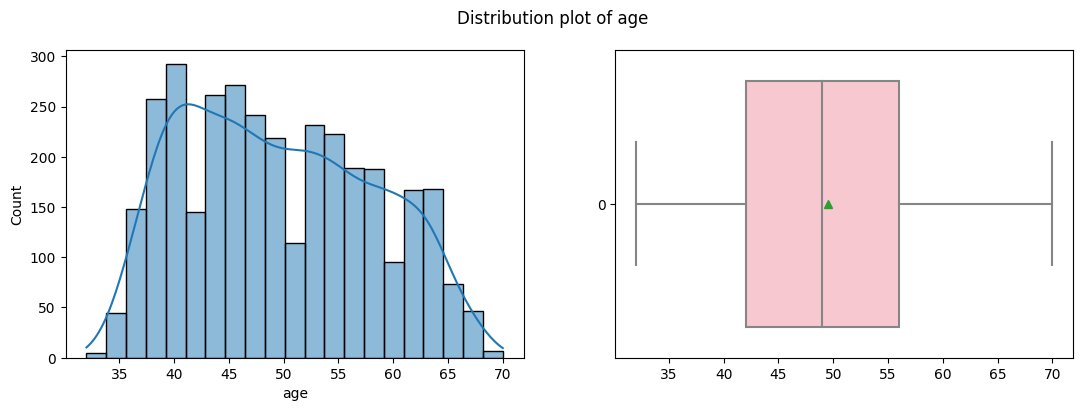

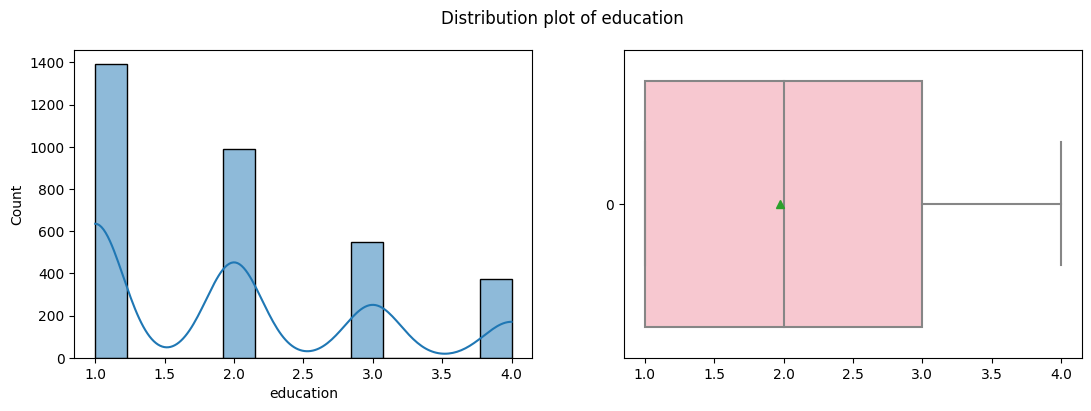

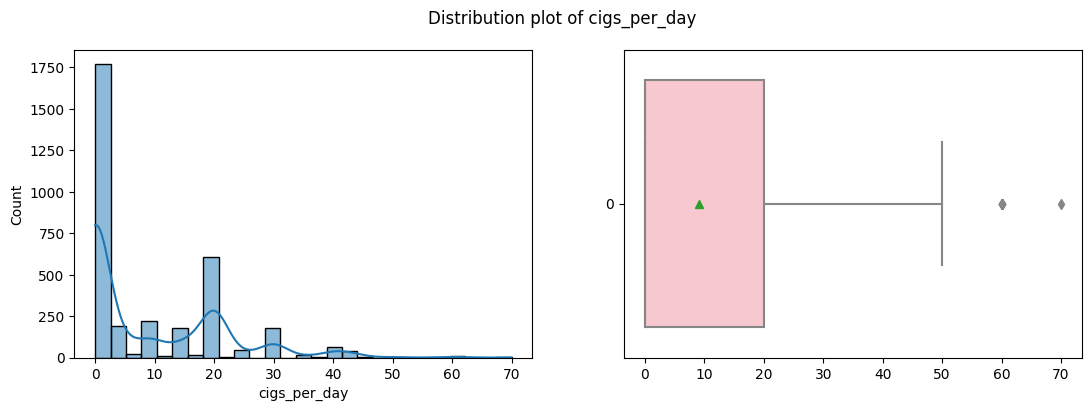

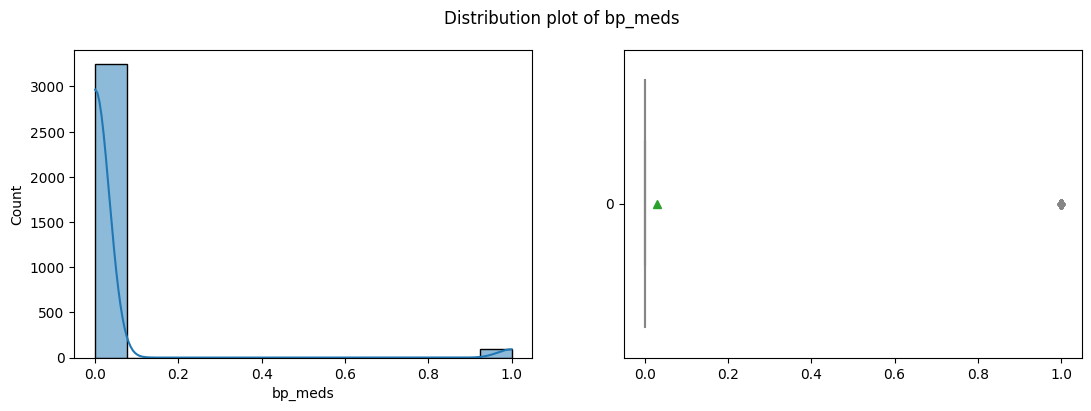

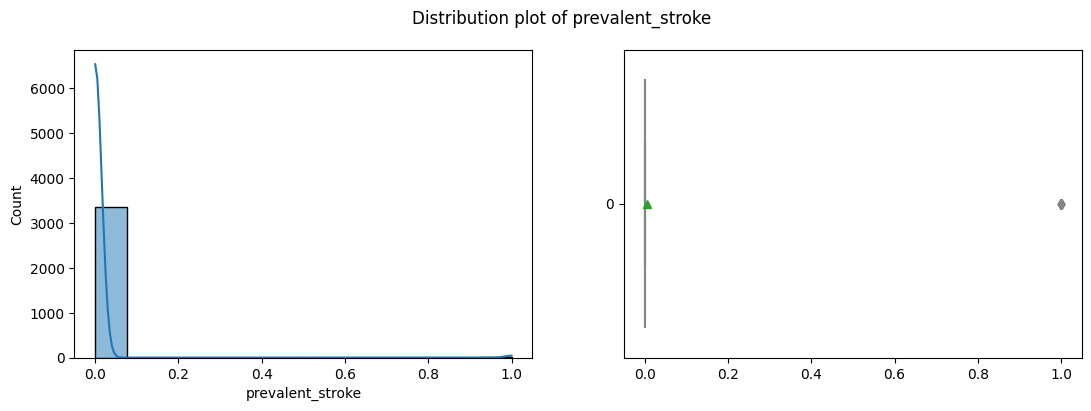

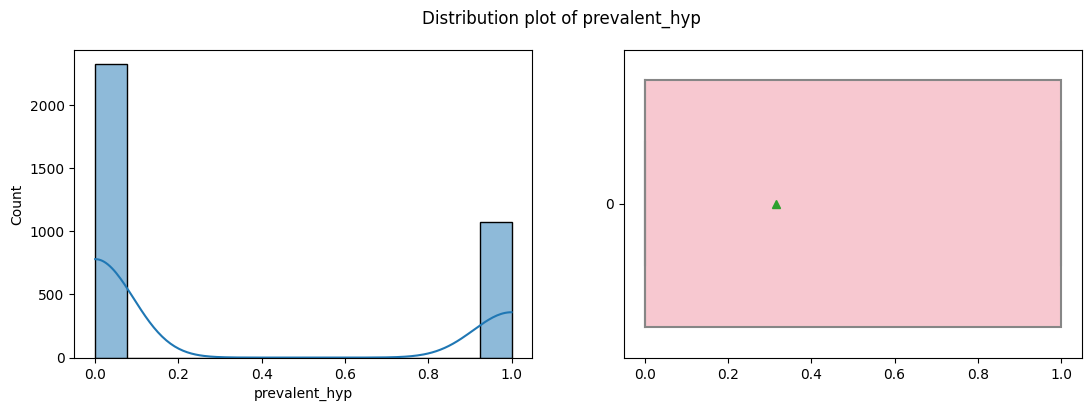

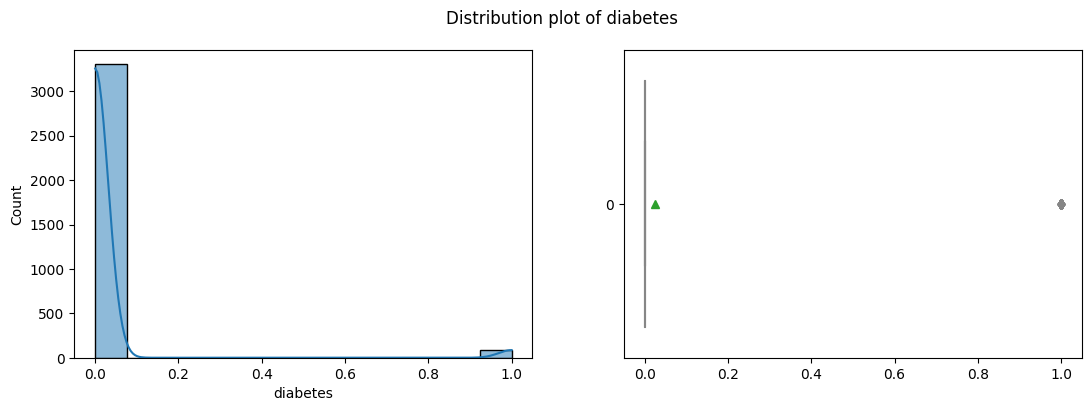

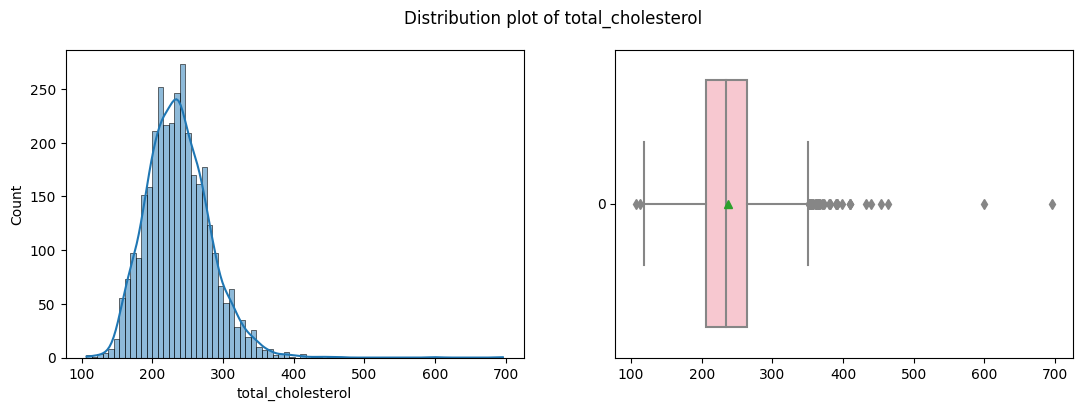

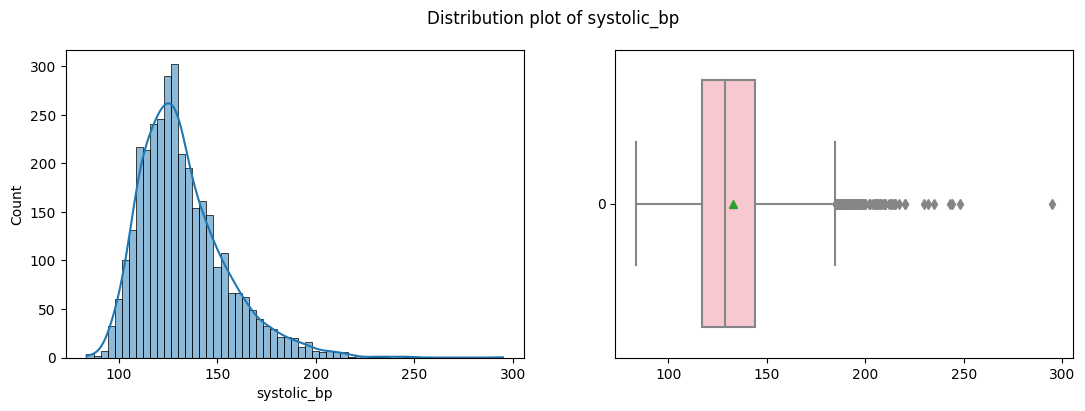

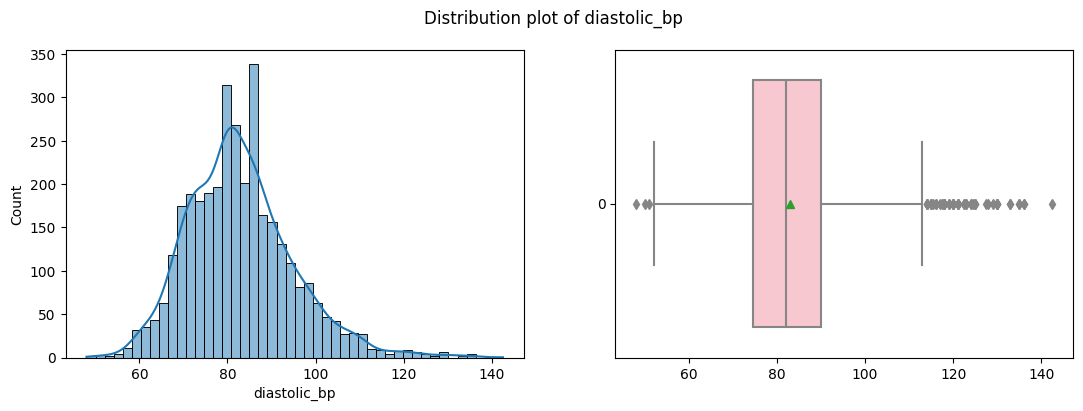

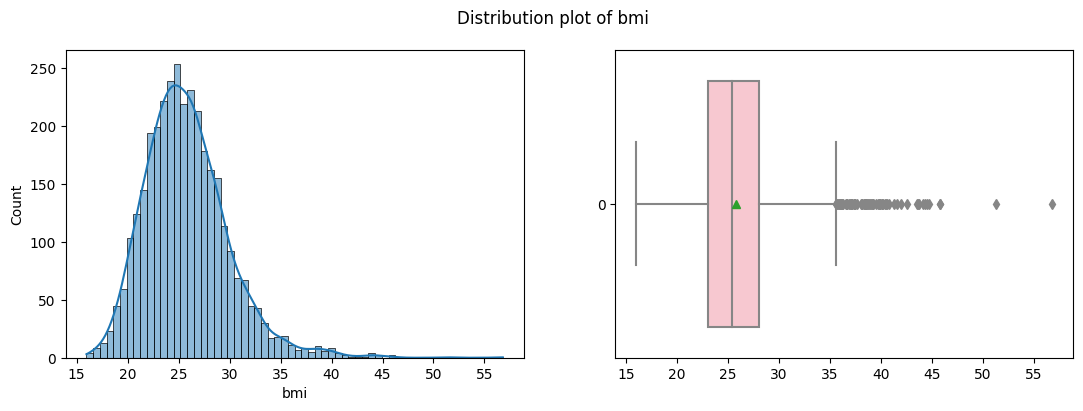

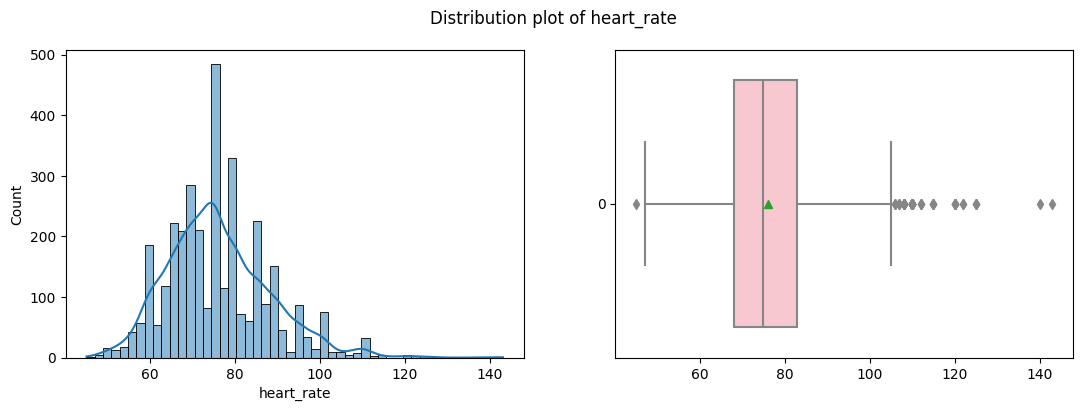

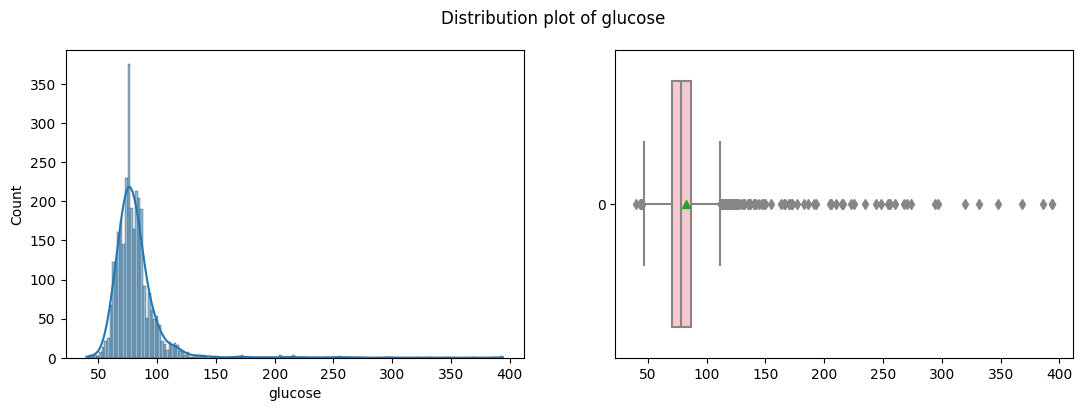

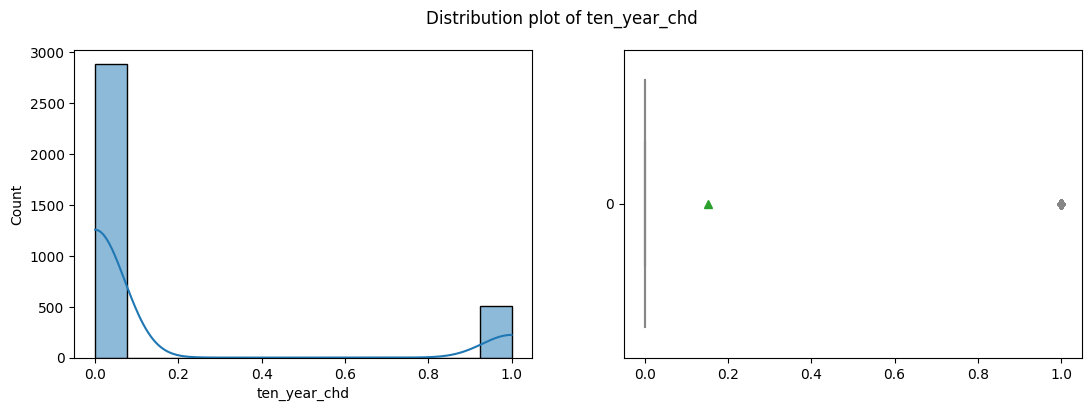

In [72]:
# Chart - 2 visualization code
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in data_2.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    sns.histplot(data_2[col], ax = axes[0],kde = True)
    sns.boxplot(data_2[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 12)
    plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also.
In the box plot, we see some outliers also which i will handle later before model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset and the outliers in the boxplot for the different continuous columns.

#### Chart - 3 : Categorical variable Distribution

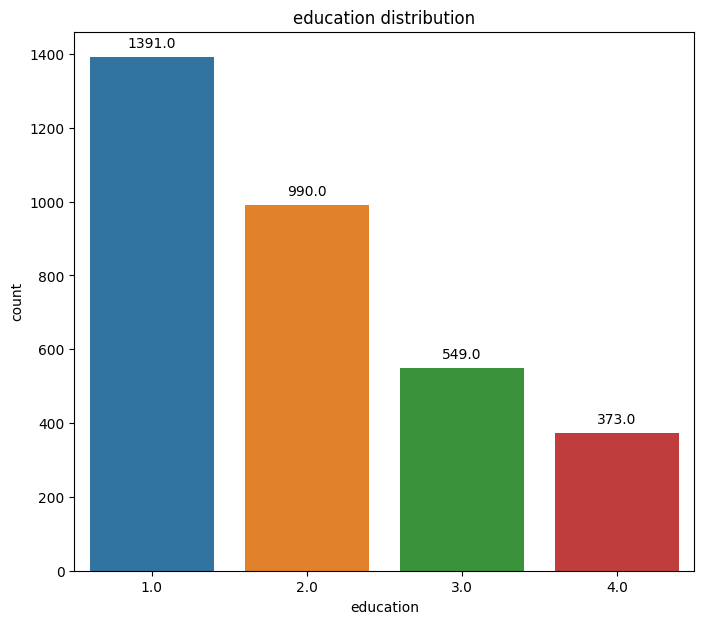

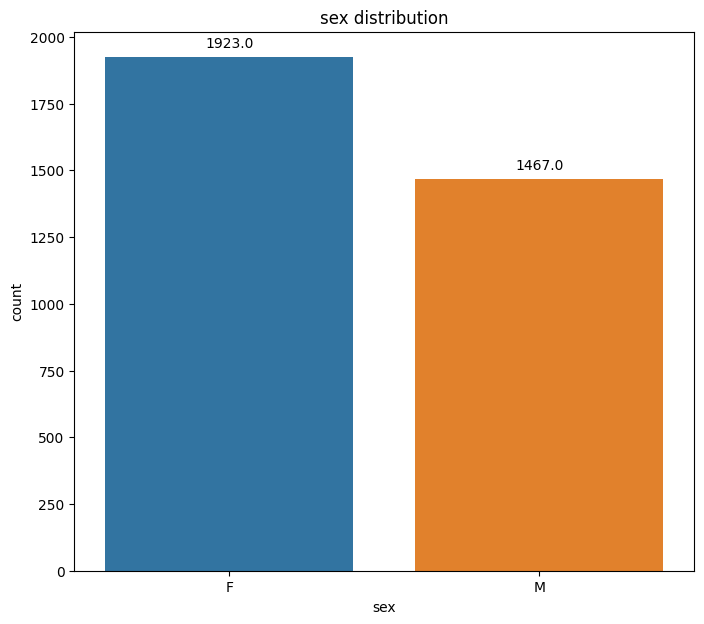

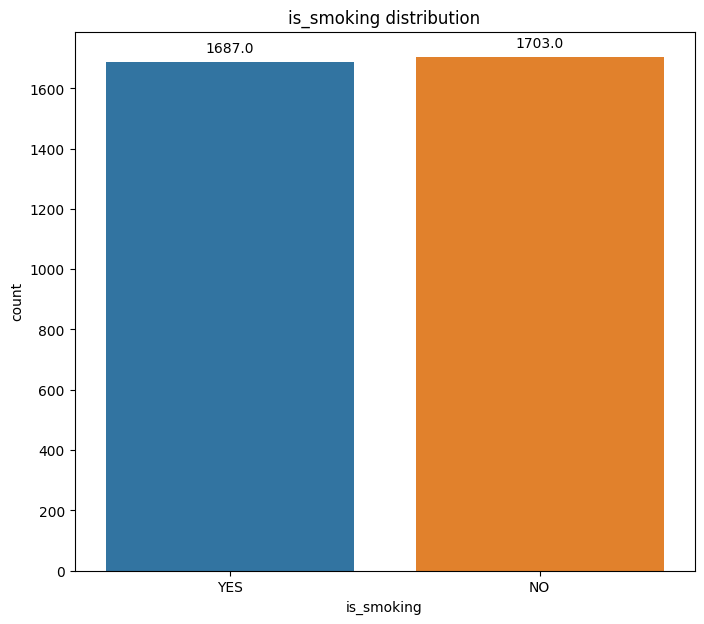

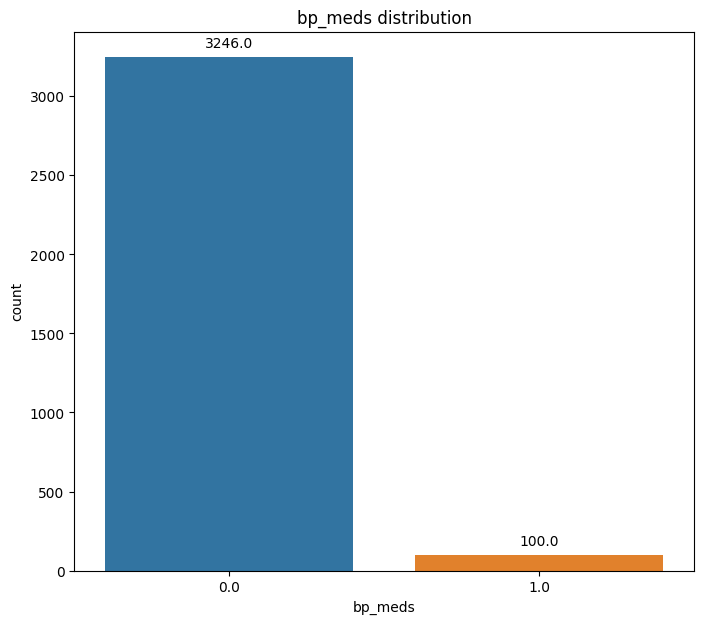

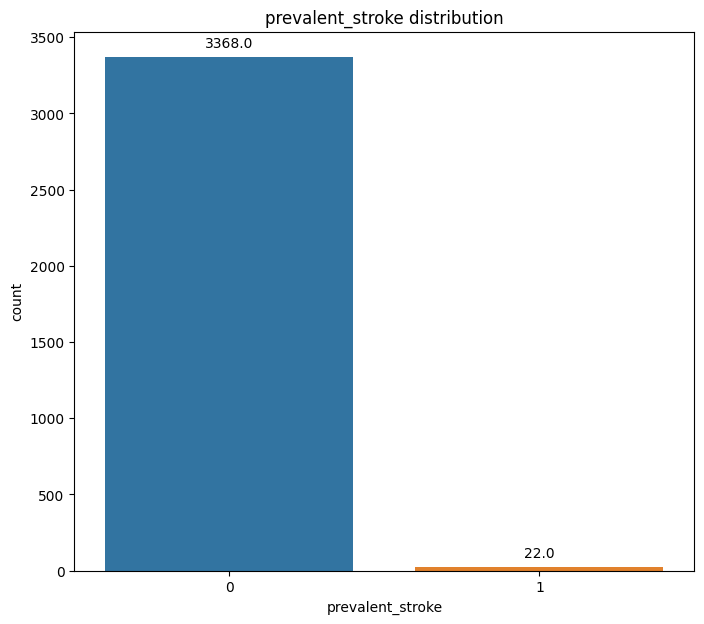

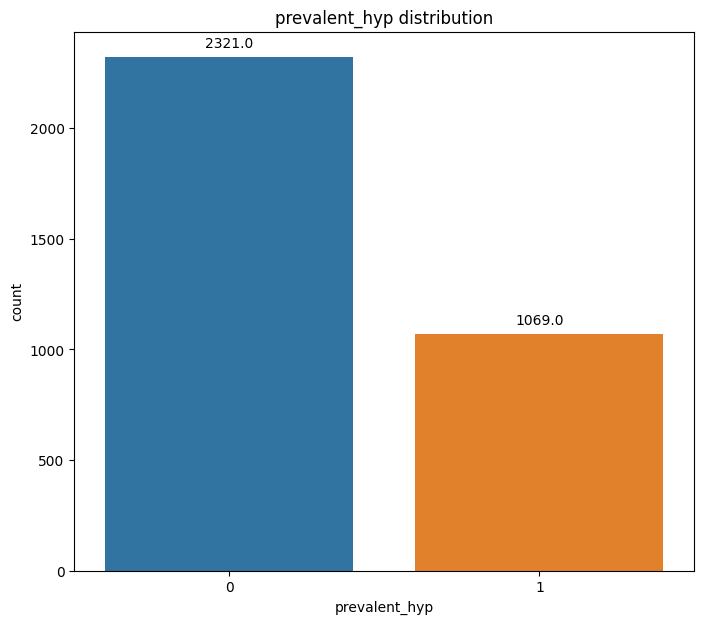

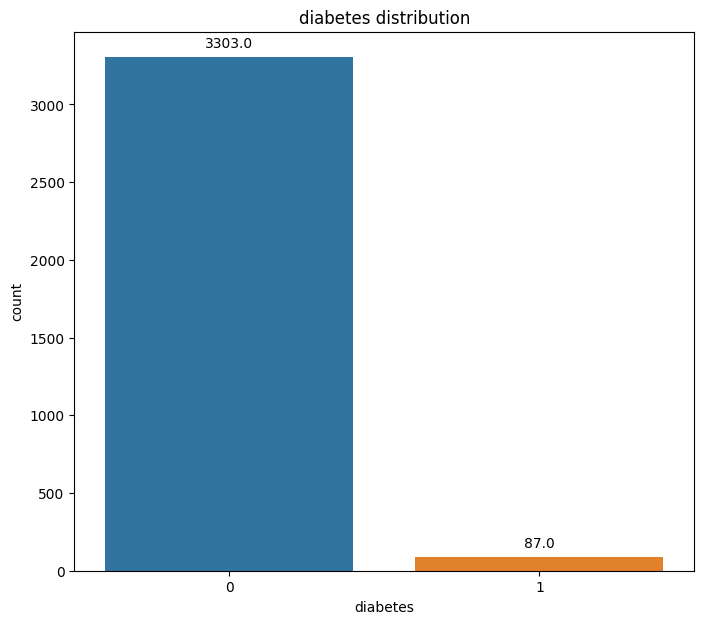

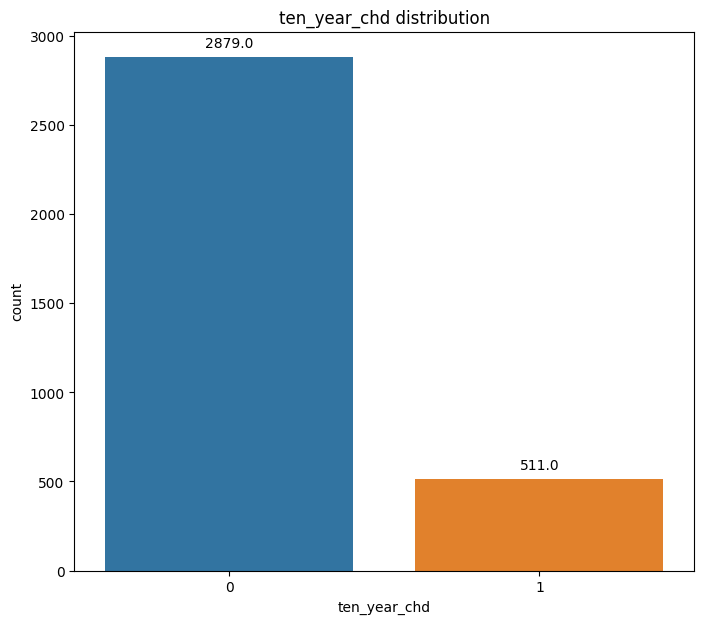

In [82]:
# Chart - 3 visualization code
# Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(8,7))
  p = sns.countplot(x=i, data = data_2)
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

The distribution of different categories in the categorical columns can be seen. The education column has the highest for the 1 category followed by 2 3 and 4.

The gender distribution is not even with high count for females.
The 'is_smoking' column is even. Bp_meds, prevalent_stroke, prevalent_hyp and diabetes are imbalanced, they have very few counts for the positive cases.

Finally the ten_year_chd is also imbalanced with few positive cases compared to the negative cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the gender distribution or design educational programs based on the education levels of the target audience. Additionally, recognizing the imbalanced distribution of health conditions can guide businesses in developing specialized treatments or preventive measures to address specific needs.

However, it is important to note that the chart alone does not provide a complete picture of the business impact. The actual impact would depend on how well these insights are utilized in business strategies and actions. Factors such as market demand, competition, and the effectiveness of the implemented strategies would also play a role in determining the overall business growth. Therefore, while the gained insights have the potential to create positive business impact, their actual realization would require further analysis and strategic implementation.

#### Chart - 4 : Dependent variable with continuous variables

<Figure size 1000x500 with 0 Axes>

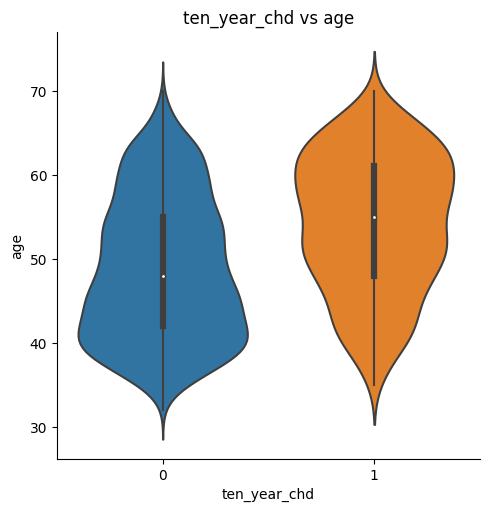

<Figure size 1000x500 with 0 Axes>

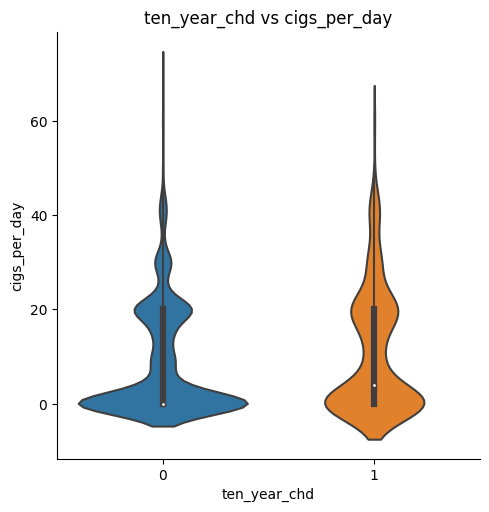

<Figure size 1000x500 with 0 Axes>

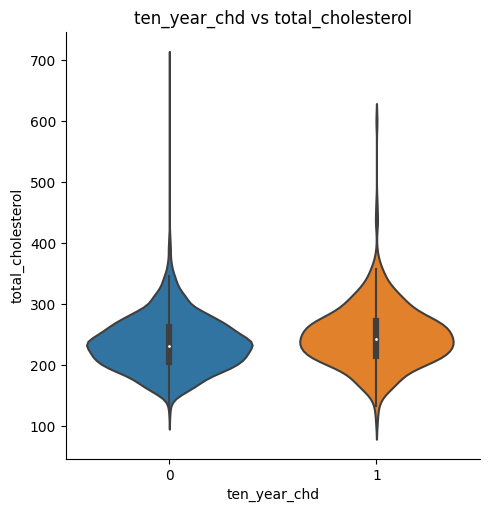

<Figure size 1000x500 with 0 Axes>

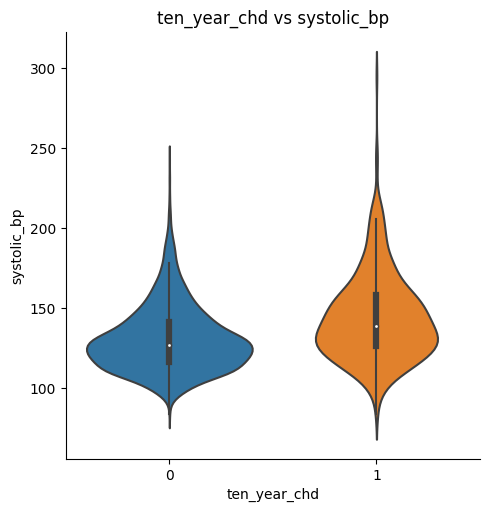

<Figure size 1000x500 with 0 Axes>

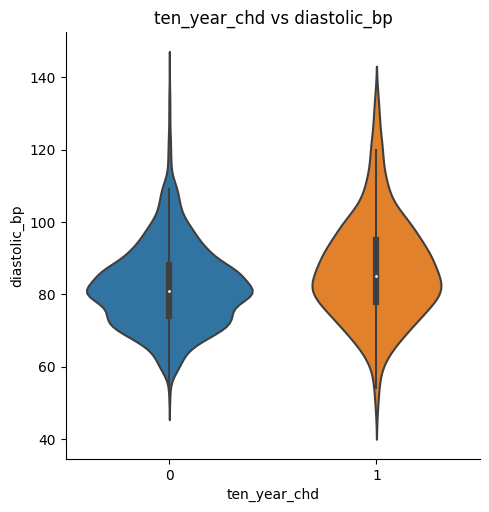

<Figure size 1000x500 with 0 Axes>

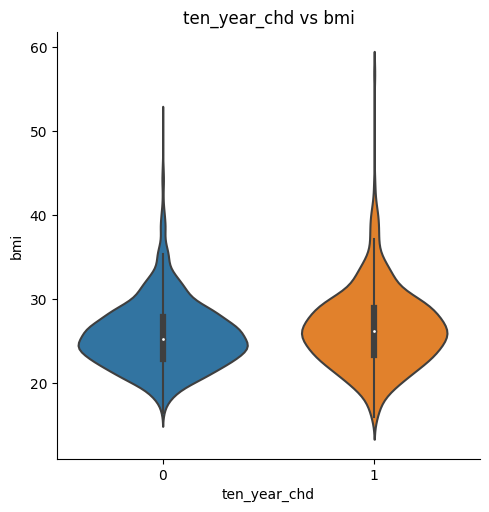

<Figure size 1000x500 with 0 Axes>

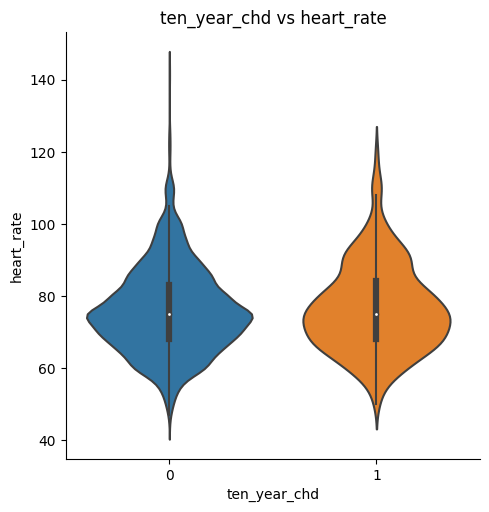

<Figure size 1000x500 with 0 Axes>

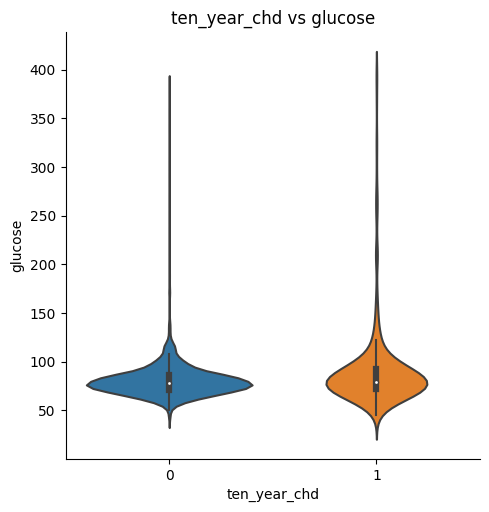

In [85]:
# Chart - 4 visualization code
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=data_2,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

##### 1. Why did you pick the specific chart?

The violin chart is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is used to display the distribution and density of data across different categories or groups. Some features of the violin chart include:

Shape and width: The shape of the violin represents the data distribution, typically displaying a mirrored, symmetrical shape. The width of the violin at different points indicates the density of data.

Quartiles and median: The central "box" in the violin chart represents the interquartile range (IQR) and contains the median value. This provides insights into the spread and central tendency of the data.

Grouping and comparison: Violin charts can be grouped or arranged side by side to compare distributions across different categories or groups. This allows for visual comparisons of data distribution shapes, spreads, and densities.

##### 2. What is/are the insight(s) found from the chart?

For age vs ten_year_chd, we see that the density for positive cases is high at higher age as compared to lower age indicating that the positive cases are higher in older people.

For digs_per_day, the negative cases are more for the non smokers compared to the positive cases for non smokers.

For ten_year_chd and glucose, the negative cases have high density compared to the positive cases for the same value of glucose.

The remaining charts do not provide much information.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the violin chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution and density of data across different categories can help businesses identify patterns, trends, and potential areas of focus. For example, the insight that positive cases of ten-year CHD are higher in older people suggests the need for targeted preventive measures or specialized treatments for this demographic. Similarly, the insight regarding the relationship between smoking and negative cases of CHD can inform smoking cessation programs or campaigns to reduce the risk of CHD.

While the insights gained from the chart can be valuable, it's important to note that the impact on business growth would depend on various factors. The actual business impact would require further analysis and strategic implementation of these insights. Additionally, without specific business context and objectives, it is challenging to determine if there are any insights that would directly lead to negative growth. However, using the insights to better understand the distribution of health conditions and risk factors can potentially help businesses in the healthcare industry develop more effective strategies and interventions to improve patient outcomes and drive positive growth.

#### Chart - 5

In [23]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [24]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [25]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [26]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [27]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [28]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [29]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [30]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [31]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [32]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [33]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [38]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [39]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [40]:
# Expand Contraction

#### 2. Lower Casing

In [41]:
# Lower Casing

#### 3. Removing Punctuations

In [42]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [43]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [44]:
# Remove Stopwords

In [45]:
# Remove White spaces

#### 6. Rephrase Text

In [46]:
# Rephrase Text

#### 7. Tokenization

In [47]:
# Tokenization

#### 8. Text Normalization

In [48]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [49]:
# POS Taging

#### 10. Text Vectorization

In [50]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [51]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [52]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [53]:
# Transform Your data

### 6. Data Scaling

In [54]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [55]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [56]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [57]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [58]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [63]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [66]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [67]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***